In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('lego/transforms_train.json', "r") as f:
    data = json.load(f)

mat = data['frames'][0]['transform_matrix']
mat = np.array(mat)
mat

array([[-9.99902189e-01,  4.19224519e-03, -1.33457193e-02,
        -5.37983216e-02],
       [-1.39886811e-02, -2.99659073e-01,  9.53943670e-01,
         3.84547043e+00],
       [-4.65661287e-10,  9.54037189e-01,  2.99688309e-01,
         1.20808232e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [3]:
# Assuming our camera is looking down the z-axis, towards -1
direction = -1 * mat[:3, [2]] # taking the first three elements in the third column because that represents the z-axis
origin = mat[:3, [3]] # taking the first three elements in the fourth column because that represents the origin of the camera

In [4]:
# Four rays going to each corner of the image
camera_ray_dirctions = np.array([[-1, -1, -1], [1, -1, -1], [1, 1, -1], [-1, 1, -1]]).T

# normalize the columns
camera_ray_dirctions = camera_ray_dirctions / np.linalg.norm(camera_ray_dirctions, axis=0)
camera_ray_origins = np.zeros_like(camera_ray_dirctions)

transformed_camera_ray_directions = mat[:3, :3] @ camera_ray_dirctions

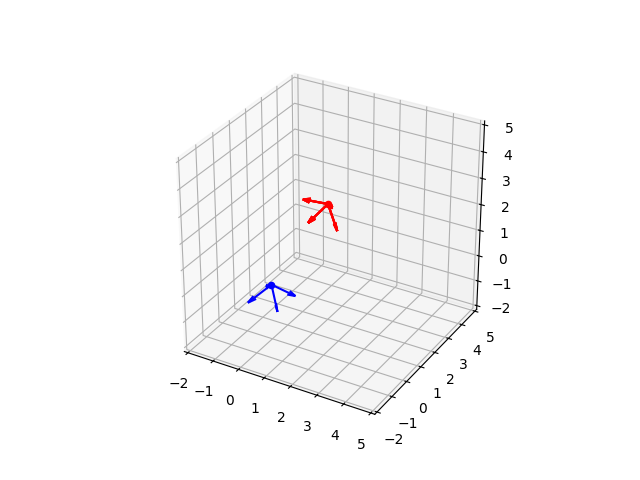

In [6]:
%matplotlib widget
# make three d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect("equal")
ax.set_xlim(-2, 5)
ax.set_ylim(-2, 5)
ax.set_zlim(-2, 5)

ax.quiver(
    camera_ray_origins[0, :], 
    camera_ray_origins[1, :], 
    camera_ray_origins[2, :],
    camera_ray_dirctions[0, :], 
    camera_ray_dirctions[1, :], 
    camera_ray_dirctions[2, :],
    color='b',  length=1, normalize=True
)



ax.quiver(
    [origin[0] for _ in range(camera_ray_dirctions.shape[-1])],
    [origin[1] for _ in range(camera_ray_dirctions.shape[-1])],
    [origin[2] for _ in range(camera_ray_dirctions.shape[-1])],
    transformed_camera_ray_directions[0, :], 
    transformed_camera_ray_directions[1, :], 
    transformed_camera_ray_directions[2, :],
    color='r',  length=1, normalize=True
)
ax.scatter(0, 0, 0, color='b')
ax.scatter(origin[0], origin[1], origin[2], color='r')